Welcome!

In [1]:
import csv
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as statfunc
import pandas as pd
import plotly.graph_objs as go
import mplfinance as mpf
from sklearn import mixture as mix
import seaborn as sns 
from pandas_datareader import data as web

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
closedata=[]
highdata=[]
lowdata=[]
day=[]
with open('reliancedata.csv', newline='') as f:
    reader = csv.DictReader(f)
    for row in reader:
        closedata.append(float(row['Close Price']))
        highdata.append(float(row['High Price']))
        lowdata.append(float(row['Low Price']))
        day.append(row['Date'])


In [2]:
df= web.get_data_yahoo('^NSEI',start= '2018-04-09', end='2020-07-09')
df=df[['Open','High','Low','Close']]
df['open']=df['Open'].shift(1)
df['high']=df['High'].shift(1)
df['low']=df['Low'].shift(1)
df['close']=df['Close'].shift(1)

df=df[['open','high','low','close']]



In [19]:
df=df.dropna()

In [20]:
unsup = mix.GaussianMixture(n_components=4, covariance_type="spherical", n_init=100, random_state=42)

In [21]:
unsup.fit(np.reshape(df,(-1,df.shape[1])))
regime = unsup.predict(np.reshape(df,(-1,df.shape[1])))

In [22]:
df['Return']= np.log(df['close']/df['close'].shift(1))

In [23]:
Regimes=pd.DataFrame(regime,columns=['Regime'],index=df.index)\
                     .join(df, how='inner')\
                          .assign(market_cu_return=df.Return.cumsum())\
                                 .reset_index(drop=False)\
                                             .rename(columns={'index':'Date'})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


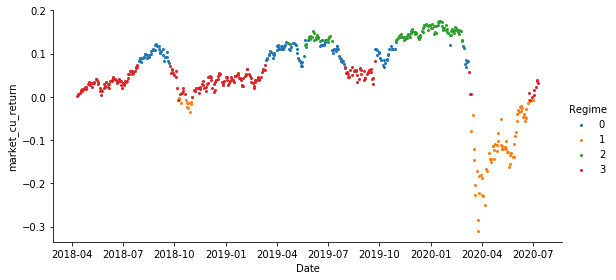

In [24]:
order=[0,1,2,3]
fig = sns.FacetGrid(data=Regimes,hue='Regime',hue_order=order,aspect=2,size= 4)
fig.map(plt.scatter,'Date','market_cu_return', s=4).add_legend()
plt.show()

In [25]:
for i in order:
    print('Mean for regime %i: '%i,unsup.means_[i][0])
    print('Co-Variancefor regime %i: '%i,(unsup.covariances_[i]))

Mean for regime 0:  11509.53529787977
Co-Variancefor regime 0:  30129.53591083525
Mean for regime 1:  9447.568061972073
Co-Variancefor regime 1:  453270.4393573308
Mean for regime 2:  12047.58666296877
Co-Variancefor regime 2:  23140.55874335928
Mean for regime 3:  10784.711367813601
Co-Variancefor regime 3:  36092.40967109589
